https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=227

In [1]:
import pandas as pd

In [2]:
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=227"

In [3]:
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [4]:
df = table[2].dropna(how="all")
df = df.dropna(axis=1)
df.shape

(61, 10)

In [5]:
import datetime

today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2020-10-23'

In [6]:
df["조회일자"] = today

In [7]:
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,나라엠앤디 *,테마 편입 사유,11750.0,1150.0,+10.85%,11700.0,11750.0,11039787.0,131746.0,2828546.0,2020-10-23
2,엠에스오토텍 *,테마 편입 사유,6310.0,230.0,+3.78%,6300.0,6310.0,562207.0,3511.0,670652.0,2020-10-23
3,현대차,테마 편입 사유,167000.0,4500.0,+2.77%,167000.0,167500.0,1877060.0,312124.0,1700524.0,2020-10-23
4,기아차,테마 편입 사유,46250.0,1050.0,+2.32%,46250.0,46300.0,1845695.0,85061.0,1650240.0,2020-10-23
5,지엠비코리아,테마 편입 사유,7530.0,170.0,+2.31%,7520.0,7530.0,178229.0,1344.0,200239.0,2020-10-23


In [8]:
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("ggplot")

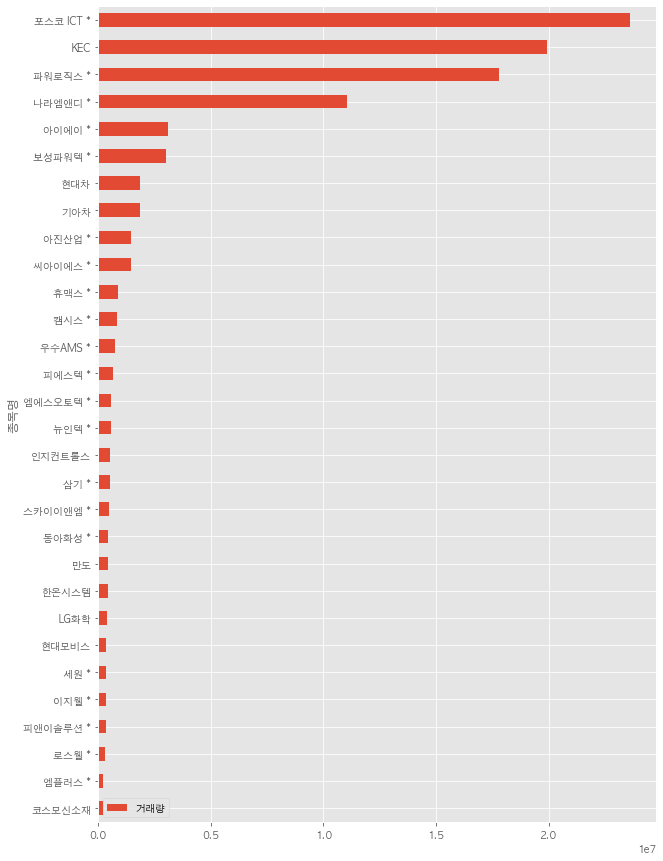

In [9]:
vol = df[["종목명", "거래량"]]
vol = vol.set_index("종목명")
vol.sort_values(by=["거래량"]).tail(30).plot.barh(figsize=(10, 15))

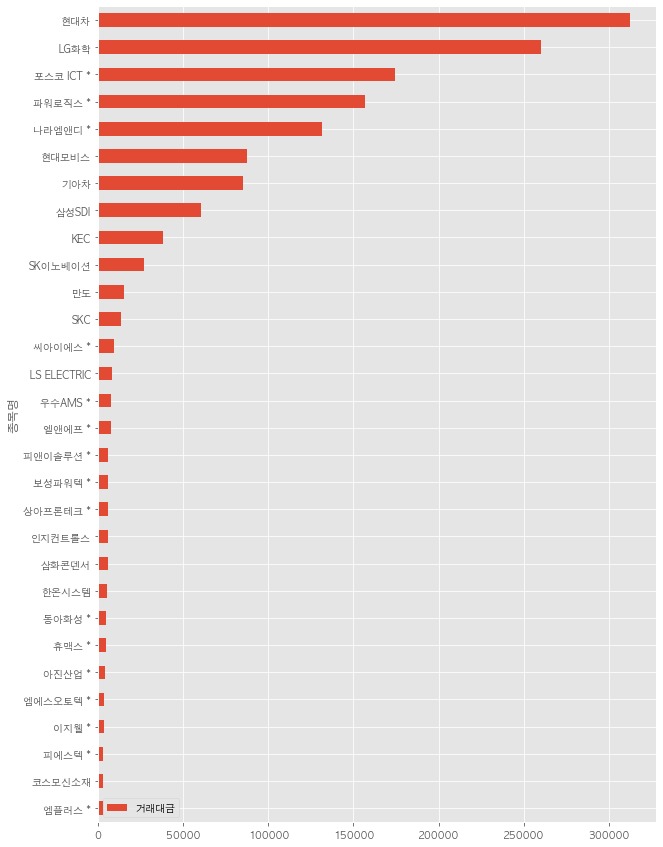

In [10]:
price = df[["종목명", "거래대금"]]
price = price.set_index("종목명")
price.sort_values(by=["거래대금"]).tail(30).plot.barh(figsize=(10, 15))


## 종목코드 수집

In [11]:
import requests
from bs4 import BeautifulSoup as bs

In [12]:
response = requests.get(url)

In [13]:
html = bs(response.text, "lxml")

In [14]:
table_2 = html.select("table")[2]

In [15]:
a_tags = table_2.select("a")

In [16]:
a_tags[0]["href"].split("=")[-1]

'051490'

In [17]:
item_list = []
for a_tag in a_tags:
    item_code = a_tag["href"].split("=")[-1]
    item_list.append(item_code)

In [18]:
df.shape

(61, 11)

In [19]:
item_code_list = pd.Series(item_list).drop_duplicates()
item_code_list = item_code_list.tolist()

In [20]:
len(item_code_list)

62

In [23]:
item_code_list.remove('javascript:;')
item_code_list

['051490',
 '123040',
 '005380',
 '000270',
 '013870',
 '204320',
 '038880',
 '117670',
 '051910',
 '022100',
 '064960',
 '041930',
 '012340',
 '265560',
 '053700',
 '115160',
 '234100',
 '140520',
 '089980',
 '090850',
 '012330',
 '136510',
 '025540',
 '080470',
 '073070',
 '010120',
 '009470',
 '096770',
 '066590',
 '011790',
 '005070',
 '066970',
 '131100',
 '050110',
 '900260',
 '011230',
 '018880',
 '243840',
 '006400',
 '125210',
 '091580',
 '336370',
 '263770',
 '215360',
 '023800',
 '014910',
 '259630',
 '012200',
 '122350',
 '092200',
 '308170',
 '131390',
 '001820',
 '013310',
 '234300',
 '046070',
 '002230',
 '222080',
 '047310',
 '006910',
 '092220']

In [24]:
df["종목코드"] = item_code_list

In [25]:
df

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드
1,나라엠앤디 *,테마 편입 사유,11750.0,1150.0,+10.85%,11700.0,11750.0,11039787.0,131746.0,2828546.0,2020-10-23,051490
2,엠에스오토텍 *,테마 편입 사유,6310.0,230.0,+3.78%,6300.0,6310.0,562207.0,3511.0,670652.0,2020-10-23,123040
3,현대차,테마 편입 사유,167000.0,4500.0,+2.77%,167000.0,167500.0,1877060.0,312124.0,1700524.0,2020-10-23,005380
4,기아차,테마 편입 사유,46250.0,1050.0,+2.32%,46250.0,46300.0,1845695.0,85061.0,1650240.0,2020-10-23,000270
5,지엠비코리아,테마 편입 사유,7530.0,170.0,+2.31%,7520.0,7530.0,178229.0,1344.0,200239.0,2020-10-23,013870
...,...,...,...,...,...,...,...,...,...,...,...,...
57,피에스텍 *,테마 편입 사유,4570.0,150.0,-3.18%,4560.0,4570.0,660470.0,3170.0,70178.0,2020-10-23,002230
58,씨아이에스 *,테마 편입 사유,6290.0,310.0,-4.70%,6280.0,6290.0,1470908.0,9422.0,1246693.0,2020-10-23,222080
59,파워로직스 *,테마 편입 사유,8280.0,480.0,-5.48%,8270.0,8280.0,17774463.0,156935.0,13948186.0,2020-10-23,047310
60,보성파워텍 *,테마 편입 사유,1915.0,125.0,-6.13%,1910.0,1915.0,3028890.0,5926.0,3273343.0,2020-10-23,006910


## 종목상세정보

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [26]:
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=092220'

In [27]:
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [28]:
tables[5]

,0,1
0,시가총액,"2,223 억원"
1,시가총액순위,코스피 465위
2,상장주식수,116706940
3,액면가l매매단위,500원 l 1주


In [29]:
# 컬럼의 수가 2인 테이블만 따로 list로 생성
item_info = []
for table in tables:
    if table.shape[1] == 2:
        item_info.append(table)

In [30]:
# 리스트의 값 확인
item_info

[          0            1
 0      시가총액    2,223  억원
 1    시가총액순위     코스피 465위
 2     상장주식수    116706940
 3  액면가l매매단위  500원  l  1주,
              0          1
 0  외국인한도주식수(A)  116706940
 1  외국인보유주식수(B)    4600866
 2  외국인소진율(B/A)      3.94%,
            0              1
 0  투자의견l목표주가    N/A  l  N/A
 1   52주최고l최저  2,985  l  475,
                    0                 1
 0   PERlEPS(2020.06)     N/A  l  -178원
 1          추정PERlEPS       N/A  l  N/A
 2  PBRlBPS (2020.06)  1.07배  l  1,785원
 3              배당수익률               NaN,
           0       1
 0  동일업종 PER  17.95배
 1  동일업종 등락률  +0.09%]

In [31]:
df_item = pd.concat(item_info)
df_item.set_index(0).T

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률,동일업종 PER,동일업종 등락률
1,"2,223 억원",코스피 465위,116706940,500원 l 1주,116706940,4600866,3.94%,N/A l N/A,"2,985 l 475",N/A l -178원,N/A l N/A,"1.07배 l 1,785원",NaN,17.95배,+0.09%


In [32]:
import time
def get_item_info(item_code):
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    # 컬럼의 수가 2인 테이블만 따로 list로 생성
    item_info = []
    for table in tables:
        if table.shape[1] == 2:
            item_info.append(table)
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    df_item["종목코드"] = item_code
    time.sleep(0.5)
    return df_item

In [33]:
get_item_info(item_code)

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률,동일업종 PER,동일업종 등락률,종목코드
1,"2,223 억원",코스피 465위,116706940,500원 l 1주,116706940,4600866,3.94%,N/A l N/A,"2,985 l 475",N/A l -178원,N/A l N/A,"1.07배 l 1,785원",NaN,17.95배,+0.09%,092220


In [34]:
from tqdm import tqdm, tqdm_pandas

tqdm_pandas(tqdm)


/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [35]:
result = df["종목코드"].progress_apply(get_item_info)

100%|██████████| 61/61 [00:54<00:00,  1.11it/s]


In [36]:
df_item_info = pd.concat(result.tolist())

In [37]:
df_info = df.merge(df_item_info)

In [38]:
df_info.shape

(61, 30)

In [39]:
df_info.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률l2019.12,동일업종 PER,동일업종 등락률,배당수익률,PERlEPS(2019.12),PBRlBPS (2019.12)
0,나라엠앤디 *,테마 편입 사유,11750.0,1150.0,+10.85%,11700.0,11750.0,11039787.0,131746.0,2828546.0,...,"14,000 l 1,900",47.57배 l 247원,N/A l N/A,"2.00배 l 5,878원",0.51%,-22.54배,0.00%,NaN,NaN,NaN
1,엠에스오토텍 *,테마 편입 사유,6310.0,230.0,+3.78%,6300.0,6310.0,562207.0,3511.0,670652.0,...,"8,130 l 2,725",N/A l -692원,N/A l N/A,"1.64배 l 3,848원",1.19%,28.92배,+0.49%,NaN,NaN,NaN
2,현대차,테마 편입 사유,167000.0,4500.0,+2.77%,167000.0,167500.0,1877060.0,312124.0,1700524.0,...,"191,500 l 65,000","24.06배 l 6,940원","19.00배 l 8,631원","0.62배 l 267,635원",2.39%,22.12배,+2.51%,NaN,NaN,NaN
3,기아차,테마 편입 사유,46250.0,1050.0,+2.32%,46250.0,46300.0,1845695.0,85061.0,1650240.0,...,"51,500 l 21,500","17.61배 l 2,626원","14.00배 l 3,247원","0.64배 l 72,087원",2.49%,22.12배,+2.51%,NaN,NaN,NaN
4,지엠비코리아,테마 편입 사유,7530.0,170.0,+2.31%,7520.0,7530.0,178229.0,1344.0,200239.0,...,"11,000 l 2,390",N/A l -362원,N/A l N/A,"0.66배 l 11,486원",0.40%,28.92배,+0.49%,NaN,NaN,NaN


In [40]:
df_info.columns

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자', '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위',
       '외국인한도주식수(A)', '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       'PERlEPS(2020.06)', '추정PERlEPS', 'PBRlBPS (2020.06)', '배당수익률l2019.12',
       '동일업종 PER', '동일업종 등락률', '배당수익률', 'PERlEPS(2019.12)',
       'PBRlBPS (2019.12)'],
      dtype='object')

In [41]:
info_cols = ['종목명', '시가총액', '시가총액순위', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
       '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       '동일업종 PER', '동일업종 등락률', '배당수익률']

In [42]:
df_info[info_cols].sort_values("시가총액순위")

,종목명,시가총액,시가총액순위,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,...,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,동일업종 PER,동일업종 등락률,배당수익률
23,성창오토텍 *,631 억원,코스닥 1009위,8640.0,0.0,0.00%,8640.0,8650.0,64017.0,555.0,...,7300000,500원 l 1주,7300000,544501,7.46%,N/A l N/A,"12,500 l 3,335",28.92배,+0.49%,NaN
54,에스트래픽 *,596 억원,코스닥 1044위,5000.0,140.0,-2.72%,4995.0,5000.0,112582.0,556.0,...,11921180,500원 l 1주,11921180,82636,0.69%,N/A l N/A,"7,219 l 2,556",22.86배,-0.55%,NaN
24,에스모 *,540 억원,코스닥 1091위,407.0,0.0,0.00%,0.0,0.0,0.0,0.0,...,132630199,100원 l 1주,132630199,4304555,3.25%,N/A l N/A,"2,170 l 360",28.92배,+0.49%,NaN
55,코다코 *,479 억원,코스닥 1157위,1225.0,35.0,-2.78%,1225.0,1240.0,109244.0,135.0,...,39064256,500원 l 1주,39064256,1036030,2.65%,N/A l N/A,"1,945 l 969",28.92배,+0.49%,NaN
17,대창스틸 *,473 억원,코스닥 1163위,2365.0,15.0,+0.64%,2365.0,2370.0,180792.0,425.0,...,20000000,500원 l 1주,20000000,588887,2.94%,N/A l N/A,"2,805 l 1,040",40.24배,+3.10%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,계양전기,"1,024 억원",코스피 711위,3140.0,50.0,-1.57%,3140.0,3160.0,67867.0,214.0,...,32600000,500원 l 1주,32600000,1215230,3.73%,N/A l N/A,"4,005 l 1,640",28.92배,+0.49%,NaN
2,현대차,"35조 6,826 억원",코스피 7위,167000.0,4500.0,+2.77%,167000.0,167500.0,1877060.0,312124.0,...,213668187,"5,000원 l 1주",213668187,66399144,31.08%,"4.00매수 l 211,842","191,500 l 65,000",22.12배,+2.51%,NaN
49,디아이씨,544 억원,코스피 905위,1400.0,25.0,-1.75%,1395.0,1400.0,62701.0,87.0,...,38888569,500원 l 1주,38888569,557317,1.43%,N/A l N/A,"2,445 l 912",28.92배,+0.49%,NaN
29,SKC,"2조 7,663 억원",코스피 90위,73700.0,0.0,0.00%,73700.0,73800.0,182934.0,13477.0,...,37534555,"5,000원 l 1주",37534555,3229513,8.60%,"4.00매수 l 107,867","104,500 l 27,700",58.15배,+1.07%,NaN


In [49]:
file_name = url.split("type=")[-1].replace("&", "_").replace("=", "_")
file_name = f"{file_name}.csv"

In [50]:
df_info.to_csv(file_name, index=False)

In [51]:
pd.read_csv(file_name)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률l2019.12,동일업종 PER,동일업종 등락률,배당수익률,PERlEPS(2019.12),PBRlBPS (2019.12)
0,나라엠앤디 *,테마 편입 사유,11750.0,1150.0,+10.85%,11700.0,11750.0,11039787.0,131746.0,2828546.0,...,"14,000 l 1,900",47.57배 l 247원,N/A l N/A,"2.00배 l 5,878원",0.51%,-22.54배,0.00%,NaN,NaN,NaN
1,엠에스오토텍 *,테마 편입 사유,6310.0,230.0,+3.78%,6300.0,6310.0,562207.0,3511.0,670652.0,...,"8,130 l 2,725",N/A l -692원,N/A l N/A,"1.64배 l 3,848원",1.19%,28.92배,+0.49%,NaN,NaN,NaN
2,현대차,테마 편입 사유,167000.0,4500.0,+2.77%,167000.0,167500.0,1877060.0,312124.0,1700524.0,...,"191,500 l 65,000","24.06배 l 6,940원","19.00배 l 8,631원","0.62배 l 267,635원",2.39%,22.12배,+2.51%,NaN,NaN,NaN
3,기아차,테마 편입 사유,46250.0,1050.0,+2.32%,46250.0,46300.0,1845695.0,85061.0,1650240.0,...,"51,500 l 21,500","17.61배 l 2,626원","14.00배 l 3,247원","0.64배 l 72,087원",2.49%,22.12배,+2.51%,NaN,NaN,NaN
4,지엠비코리아,테마 편입 사유,7530.0,170.0,+2.31%,7520.0,7530.0,178229.0,1344.0,200239.0,...,"11,000 l 2,390",N/A l -362원,N/A l N/A,"0.66배 l 11,486원",0.40%,28.92배,+0.49%,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,피에스텍 *,테마 편입 사유,4570.0,150.0,-3.18%,4560.0,4570.0,660470.0,3170.0,70178.0,...,"5,050 l 1,800",N/A l -177원,N/A l N/A,"0.60배 l 7,565원",3.28%,125.16배,-1.56%,NaN,NaN,NaN
57,씨아이에스 *,테마 편입 사유,6290.0,310.0,-4.70%,6280.0,6290.0,1470908.0,9422.0,1246693.0,...,"9,410 l 2,065",76.71배 l 82원,N/A l N/A,"5.95배 l 1,057원",NaN,125.16배,-1.56%,NaN,NaN,NaN
58,파워로직스 *,테마 편입 사유,8280.0,480.0,-5.48%,8270.0,8280.0,17774463.0,156935.0,13948186.0,...,"10,950 l 4,725",16.93배 l 489원,N/A l N/A,"1.24배 l 6,675원",0.60%,125.16배,-1.56%,NaN,NaN,NaN
59,보성파워텍 *,테마 편입 사유,1915.0,125.0,-6.13%,1910.0,1915.0,3028890.0,5926.0,3273343.0,...,"2,480 l 1,025",63.83배 l 30원,N/A l N/A,"1.07배 l 1,795원",NaN,-71.11배,-0.33%,NaN,NaN,NaN
